# MATH 441 Discrete Optimization Problems

## September 22, 2022

* Graphs
* Network Flows

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## Graphs

* A **graph** is a pair $(V,E)$ where $V$ is a set of **nodes** and $E$ is a set of **edges**.
* Enumerate the nodes such that each node has an index $i$.
* An edge is a line which connects a pair of nodes. An edge which connects nodes $i$ and $j$ is represented by the pair of indices $(i,j)$ .
* A **directed graph** is a graph where the edges are ordered pairs $(i,j)$ such that the edge is drawn from $i$ to $j$.
* Represent a node by its coordinates in 2D. The set $V$ of nodes is a matrix such that row $i$ is the vector $(x,y)$ of coordinates of node $i$.

Write a function called `plotG` which takes a matrix of node coordinates `V` and a matrix of edge indices `E` (as described above) and plots the directed graph. Optional arguments `arrow_length` and `arrow_width` allow the user to specify the length and width of the arrows along the edges.

In [2]:
def plotG(V,E,arrow_length=0.5,arrow_width=0.01):
    V = np.array(V); E = np.array(E);
    for e in E:
        i,j = e
        plt.plot([V[i,0],V[j,0]],[V[i,1],V[j,1]],'k')
        plt.arrow(V[i,0],V[i,1],(V[j,0] - V[i,0])*arrow_length,(V[j,1] - V[i,1])*arrow_length,width=arrow_width,color='k')
    plt.plot(V[:,0],V[:,1],'w.',markersize=40,markeredgecolor='k')
    for i in range(V.shape[0]):
        plt.annotate(str(i),xy=V[i,:],ha='center',va='center')
    plt.axis("equal"), plt.axis(False)
    plt.show()

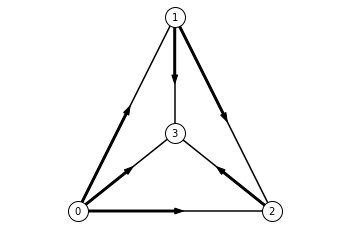

In [3]:
V = [(0,0),(0.5,1),(1,0),(0.5,0.4)]
E = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
plotG(V,E)

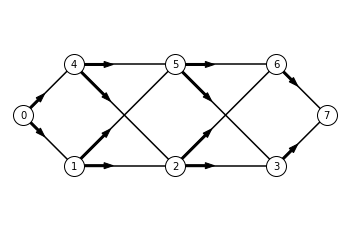

In [4]:
V = np.array([(-0.5,0.5),(0,0),(1,0),(2,0),(0,1),(1,1),(2,1),(2.5,0.5)])
E = np.array([(0,4),(0,1),(4,5),(1,2),(5,6),(2,3),(6,7),(3,7),(4,2),(1,5),(5,3),(2,6)])
plotG(V,E,arrow_length=0.3,arrow_width=0.02)

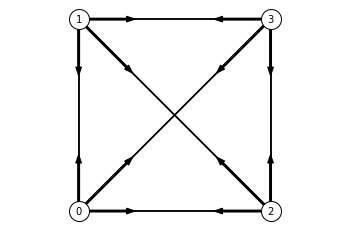

In [5]:
V = [(0,0),(0,1),(1,0),(1,1)]
E = [(0,1),(0,2),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2)]
plotG(V,E,arrow_length=0.25)

## Network Flows

* A **network** is a connected, directed graph $G = (V,E)$.
* For each node $i$, specify a **supply/demand** value $b_i$. If $b_i > 0$ we call it a supply and $b_i < 0$ is a demand.
* **Assumption**: the network is closed so that the total supply is equal to the demand: $\sum_i b_i = 0$.
* For each pair of nodes $i$ and $j$, there is a **cost** $c_{ij}$ to ship a unit of product from node $i$ to node $j$.
* A **network flow** is a matrix $X = [x_{ij}]$ where $x_{ij}$ is the amount of product which flows from node $i$ to node $j$.
* A network flow matrix $X = [x_{ij}]$ for a network $G=(V,E)$ is $n \times n$ matrix where $n = |V|$ is number of vertices.
* The cost of a network flow is $\sum_{(i,j)} c_{ij}x_{ij}$.
* If node $i$ is not connected to node $j$ by an edge then $x_{ij} = 0$ and $c_{ij} = 0$.
* The **balance equation** at each node specifies that the flow into a node minus the flow out is equal to the supply/demand.
* The balance equation at node $k$ is:

$$\sum_{i} x_{ik} - \sum_{j} x_{kj} = -b_k$$

A network flow problem is a linear optimization problem with $n^2$ decision variables where $n=|V|$ is the number of nodes. We assume there is no flow from a node to itself therefore $x_{ii} = 0$ for each $i$ and so there are only $n^2 - n$ unknowns.

Enumerate the flows $x_{ij}$ such that the flow from node $i$ to node $j$ has index $in+j$ where $n=|V|$ is the total number of nodes in the graph. For example, the matrix $X$ below shows the index $in+j$ for $x_{ij}$ and the flattened vector $\mathbf{x}$.

In [6]:
n = 4
X = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        X[i,j] = i*n + j
print(X)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]


In [7]:
x = X.flatten()
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


Write a function called `balance` which creates the matrix for the balance equations for a graph with $n$ nodes including the constraints $x_{ii}=0$.

In [8]:
def balance(n):
    A = np.zeros((2*n,n**2))
    for i in range(n):
        A[i,range(i*n,(i+1)*n)] = -1.0
        A[i,i*n+i] = 0.0
        A[i,range(i,n**2,n)] = 1.0
        A[i,i*n+i] = 0.0
    for i in range(0,n):
        A[i+n,i*n+i] = 1.0
    return A

In [9]:
print(balance(4))

[[ 0. -1. -1. -1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0. -1. -1.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0. -1. -1.  0. -1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1. -1. -1. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


**Example.** Let $G$ be a fully connected network with $n=4$ nodes such that $c_{ij} = 1$ for each pair $(i,j)$ where $i \ne j$, and $b_0 = 1$ and $b_1 = b_2 = b_3 = -1/3$. Find the optimal network flow.

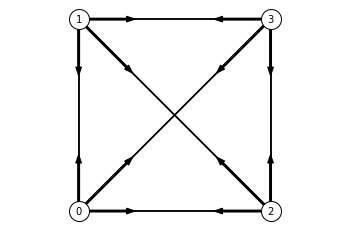

In [10]:
V = [(0,0),(0,1),(1,0),(1,1)]
E = [(0,1),(0,2),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2)]
plotG(V,E,arrow_length=0.25)

Construct the cost matrix:

In [11]:
n = len(V)
C = np.ones((n,n)) - np.eye(n)
print(C)

[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


The matrix $C$ corresponds to the flattened vector $\mathbf{c}$:

In [12]:
c = C.flatten()
print(c)

[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


Construct the matrix $A$ for the balance equations:

In [13]:
A = balance(n)
print(A)

[[ 0. -1. -1. -1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0. -1. -1.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0. -1. -1.  0. -1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1. -1. -1. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


Construct the constraint vector $\mathbf{b}$ which includes supply/demand values $b_i$ and $x_{ii} = 0$:

In [14]:
b = np.array([1,-1/3,-1/3,-1/3,0,0,0,0])
print(b)

[ 1.         -0.33333333 -0.33333333 -0.33333333  0.          0.
  0.          0.        ]


The optimal network flow $\mathbf{x}$ is the optimal solution of the linear program: minimize $\mathbf{c}^T \mathbf{x}$ subject to $A \mathbf{x} = -\mathbf{b}$, $\mathbf{x} \geq 0$. Use `linprog` to compute the solution.

In [15]:
solution = linprog(c,A_eq=A,b_eq=-b)

/var/folders/2h/25vcwmr52mvfqs1h92028rph0000gn/T/ipykernel_18097/1005512098.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  solution = linprog(c,A_eq=A,b_eq=-b)


In [16]:
solution

     con: array([-3.32334160e-12,  1.10772502e-12,  1.10783605e-12,  1.10772502e-12,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])
     fun: 1.0000000000316924
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-0.00000000e+00,  3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
        2.61468550e-12, -0.00000000e+00,  3.22128039e-12,  3.22128039e-12,
        2.61468550e-12,  3.22128039e-12, -0.00000000e+00,  3.22128039e-12,
        2.61468550e-12,  3.22128039e-12,  3.22128039e-12, -0.00000000e+00])

**Question**. Why is $A$ not full rank?

In [17]:
A.shape

(8, 16)

In [18]:
np.linalg.matrix_rank(A)

7

We setup `linprog` with equality constraints above. Let's solve again using inequality constraints $A \mathbf{x} \leq -\mathbf{b}$ and $-A \mathbf{x} \leq \mathbf{b}$.

In [19]:
solution = linprog(c,np.vstack([A,-A]),np.hstack([-b,b]))

In [20]:
solution

     con: array([], dtype=float64)
     fun: 1.000000000115818
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-8.13793477e-14,  2.70339306e-14,  2.70894418e-14,  2.72004641e-14,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        8.13793477e-14, -2.70339306e-14, -2.70894418e-14, -2.72004641e-14,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])
  status: 0
 success: True
       x: array([0.00000000e+00, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       2.74736570e-12, 0.00000000e+00, 1.65691803e-11, 1.65691803e-11,
       2.74736570e-12, 1.65691803e-11, 0.00000000e+00, 1.65691803e-11,
       2.74736570e-12, 1.65691803e-11, 1.65691803e-11, 0.00000000e+00])

This is the same solution. We can view the network flow matrix $X$:

In [21]:
solution.x.reshape((4,4)).round(5)

array([[0.     , 0.33333, 0.33333, 0.33333],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ]])

Clearly the optimal flow is $x_{0,1}=x_{0,2}=x_{0,3}=1/3$ and $x_{ij}=0$ otherwise.

**Question.** There is no flow from a node to itself $x_{ii}=0$ but the matrices $A$, $C$, $X$, $\mathbf{b}$ and $\mathbf{c}$ include $x_{ii}$. How can we formulate $A$, $C$, $X$, $\mathbf{b}$ and $\mathbf{c}$ more efficiently so that we don't need to include $x_{ii}$?

## NetworkX

[NetworkX](https://networkx.org) is a Python package for working with graphs.

In [22]:
import networkx as nx

**Question.** How does NetworkX work? How do you create graphs and plot them using NetworkX?